In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix

import tensorflow as tf

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import keras.backend as K
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 16} ) 
sess = tf.Session(config=config) 
K.set_session(sess)
sns.set(style='white', context='notebook', palette='deep')
%matplotlib inline

In [34]:
data= pd.read_csv("../input/train.csv")
test_data= pd.read_csv("../input/test.csv")

In [35]:
print('shape of the data is:',data.shape)

shape of the data is: (42000, 785)


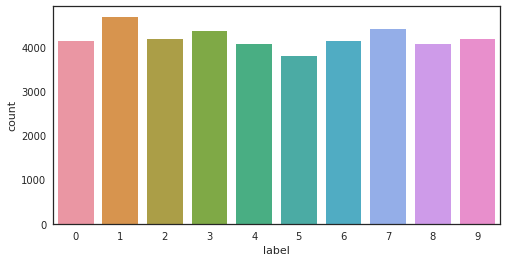

In [36]:
#checking if the data is skewed
plt.figure(figsize=(8,4))
sns.countplot(data.label)
# (data.label.value_counts()/len(data)).sort_index().plot.bar()
# sns.distplot(data.label,bins=10,kde=False)

In [37]:
# checking for null values
data.label.isnull().value_counts()

False    42000
Name: label, dtype: int64

So, all labels are properly labeled

Now checking for remaining columns

In [38]:
data.isnull().sum().sum()

0

In [39]:
#extracting labels
Y=data.label
data.drop(labels=['label'],axis=1,inplace=True)
#Normalising values to remove effects of illuminationa and faster convergence
data/=255.0;

In [40]:
train_image_array=np.array(data).reshape(-1,28,28,1)
print("shape of new train array:",train_image_array.shape )

shape of new train array: (42000, 28, 28, 1)


3


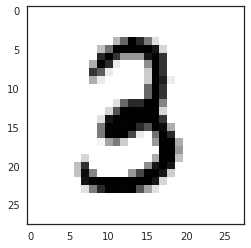

In [41]:
#checking if everything is correct
print(Y[20000])
plt.figure(1)
plt.gray()
plt.imshow(train_image_array[20000,:,:,0],cmap=plt.cm.binary)
plt.show()

In [42]:
#preparing output for CNN
train_label = to_categorical(Y)
train_label.shape

(42000, 10)

# CNN Model

In [43]:
model= Sequential()
model.add(Conv2D(filters = 32, 
                 kernel_size = (5,5),
                 padding = 'Same',
                 activation ='relu',
                 input_shape = (28,28,1)))
model.add(MaxPool2D( (2,2) ) )

model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3),
                 padding = 'Same',
                 activation ='sigmoid') )
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, 
                 kernel_size = (3,3),
                 padding = 'Same',
                 activation ='relu') )
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, 
                 kernel_size = (3,3),
                 strides=(2,2),
                 padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, 
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train_image_array,train_label,test_size=0.1,random_state=42)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
epochs=30
batch_size=100
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs)
# ,
#           validation_data=(X_test,y_test))

In [ ]:
test_data=pd.read_csv('../input/test.csv')

In [ ]:
test_data/=255.0
test_image_array=np.array(test_data).reshape(-1,28,28,1)

In [ ]:
test_image_array.shape

In [ ]:
results = model.predict(test_image_array)

In [ ]:
pred = []
numTest = results.shape[0]
for i in range(numTest):
    pred.append(np.argmax(results[i])) 
predictions = np.array(pred)  

In [ ]:
sample_submission = pd.read_csv('../input/sample_submission.csv')
#print(sample_submission.shape)
result=pd.DataFrame({'ImageId':sample_submission.ImageId, 'Label':predictions})
result.to_csv("submission.csv",index=False)
print(result)